In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 15})

In [2]:
df = pd.read_csv('../data/supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


1. Create a bar plot to compare the gross income per purchase for each product line.

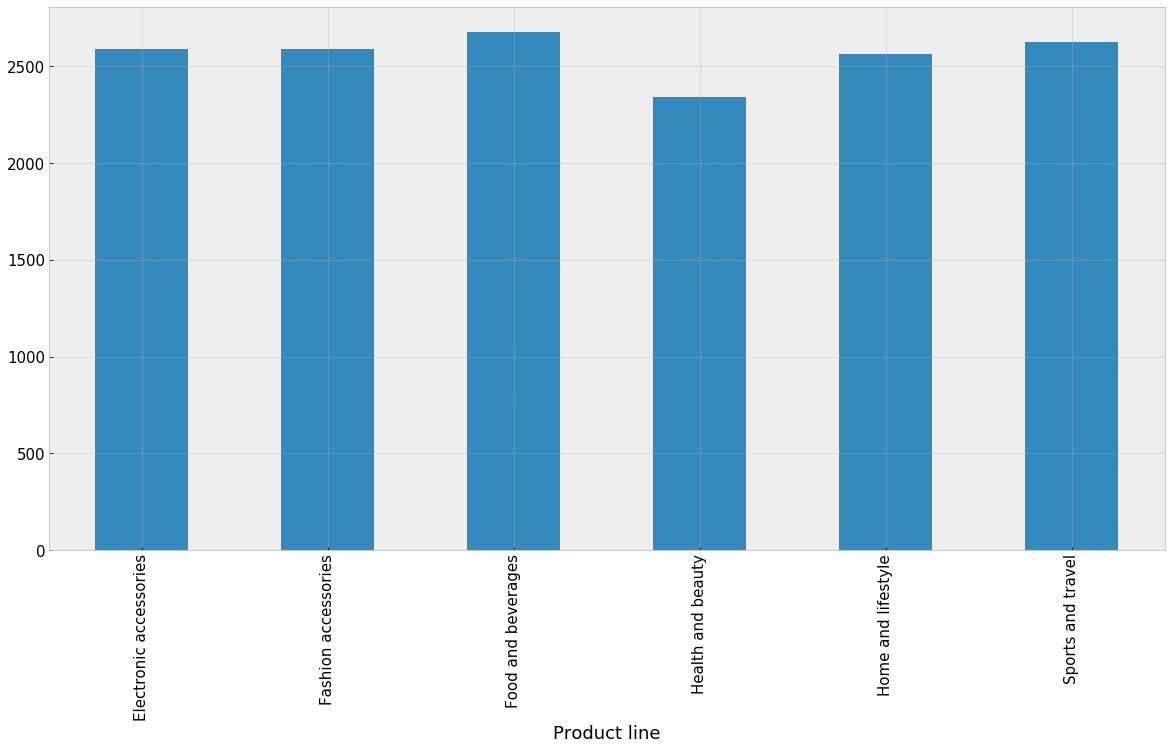

In [4]:
## ANS
# get requried data
df.groupby(['Product line']).get_group('Health and beauty')
df.groupby(['Product line']).sum()['gross income']
#plot
df.groupby(['Product line']).sum()['gross income'].plot(kind='bar')

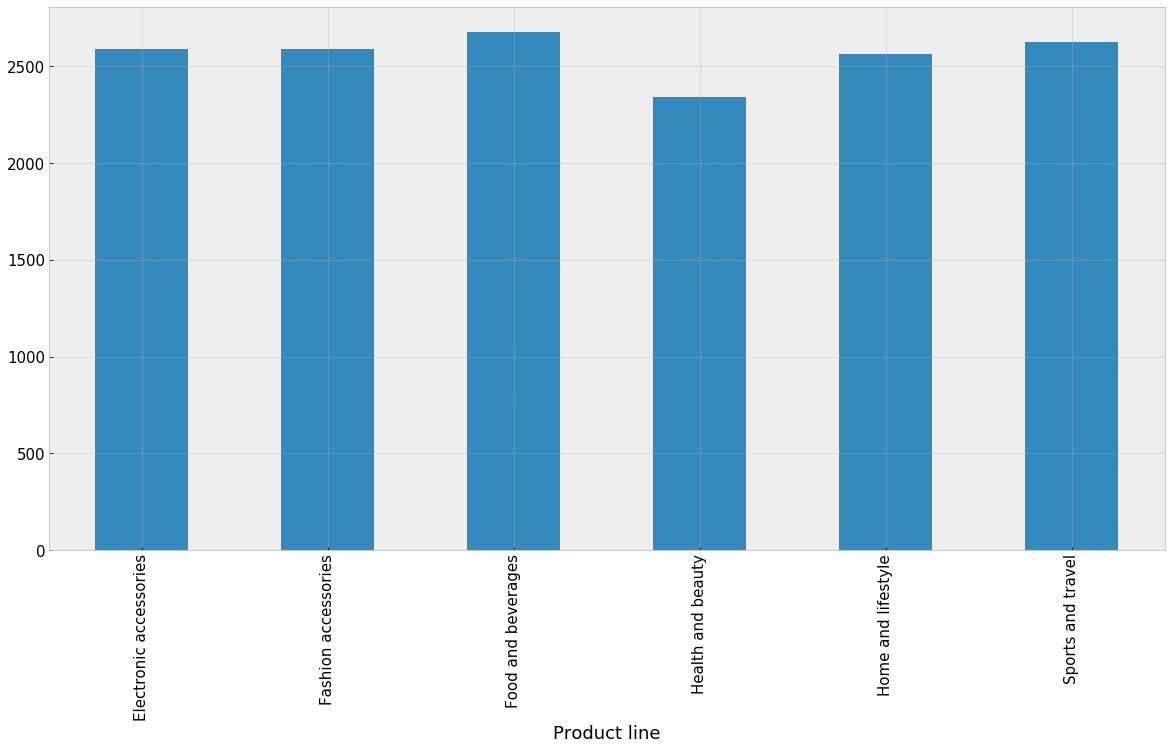

In [5]:
df.groupby('Product line')['gross income'].sum().plot.bar()

2. Create a pie chart that compares the total gross income between males and females. Include the percentage values.

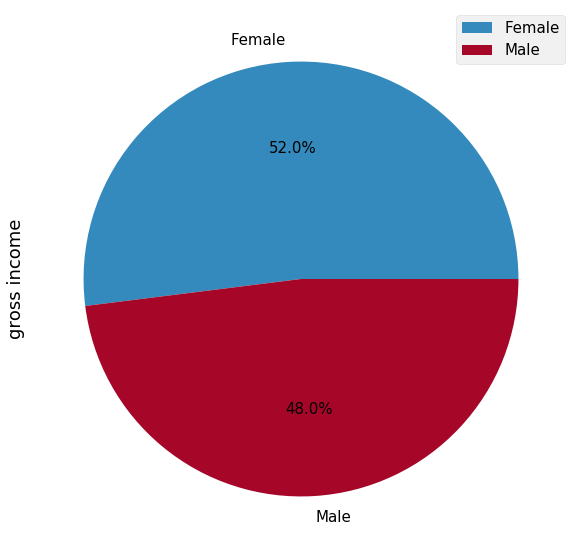

In [6]:
df.groupby('Gender')['gross income'].sum().plot.pie( autopct='%1.1f%%',legend= True)

3. Create a pie chart that compares the total gross income between each city. Include the percentage values.

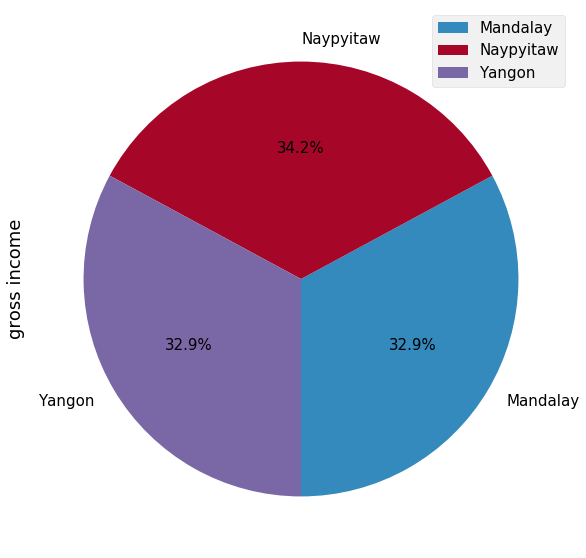

In [7]:
df.groupby('City')['gross income'].sum().plot.pie( startangle=270,autopct='%1.1f%%',legend= True)

4. Create a distribution of the prices of the products in the 'Home and Lifestyle' product line.

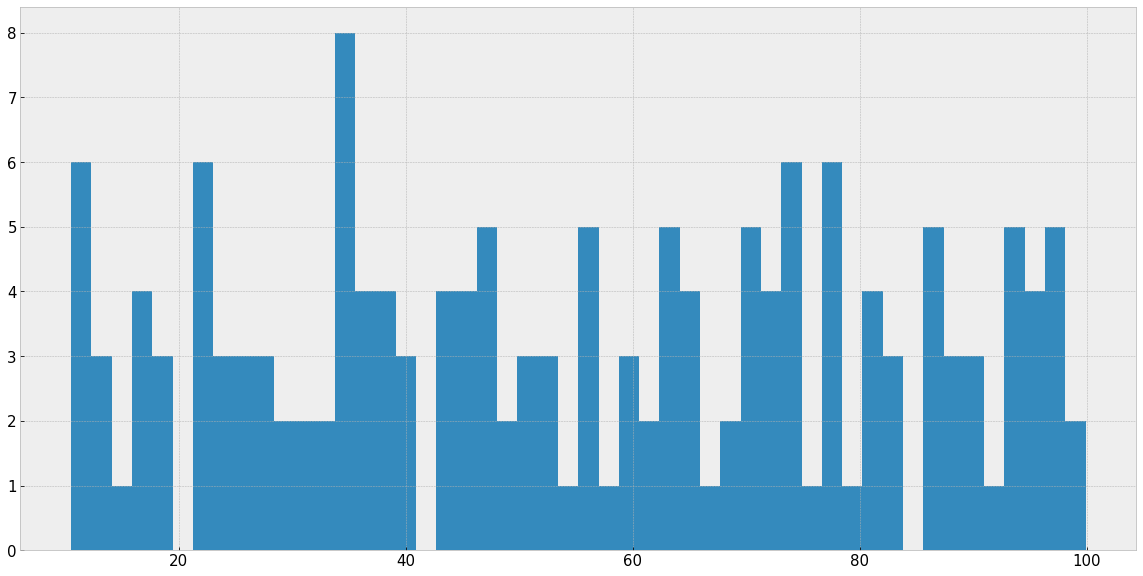

In [8]:
## ANS FROM OTHER
df[(df['Product line'] == "Home and lifestyle")]["Unit price"].hist(bins=50)

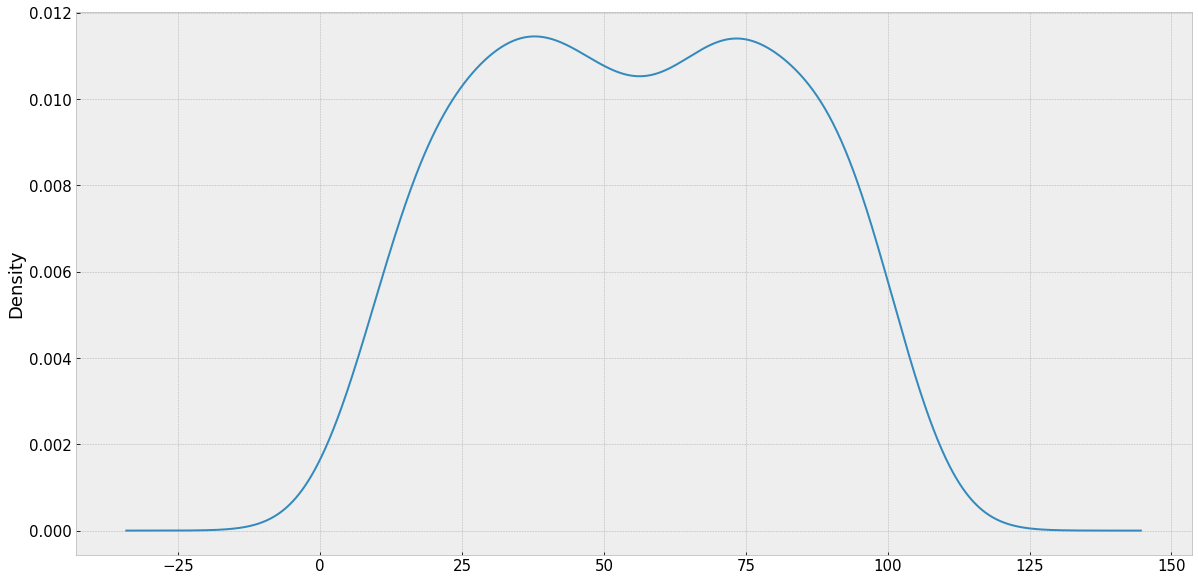

In [133]:
df[df['Product line']=='Home and lifestyle']['Unit price'].plot.kde()

5. Plot the in total gross income for each day from 2019-01-01 to 2019-03-30.

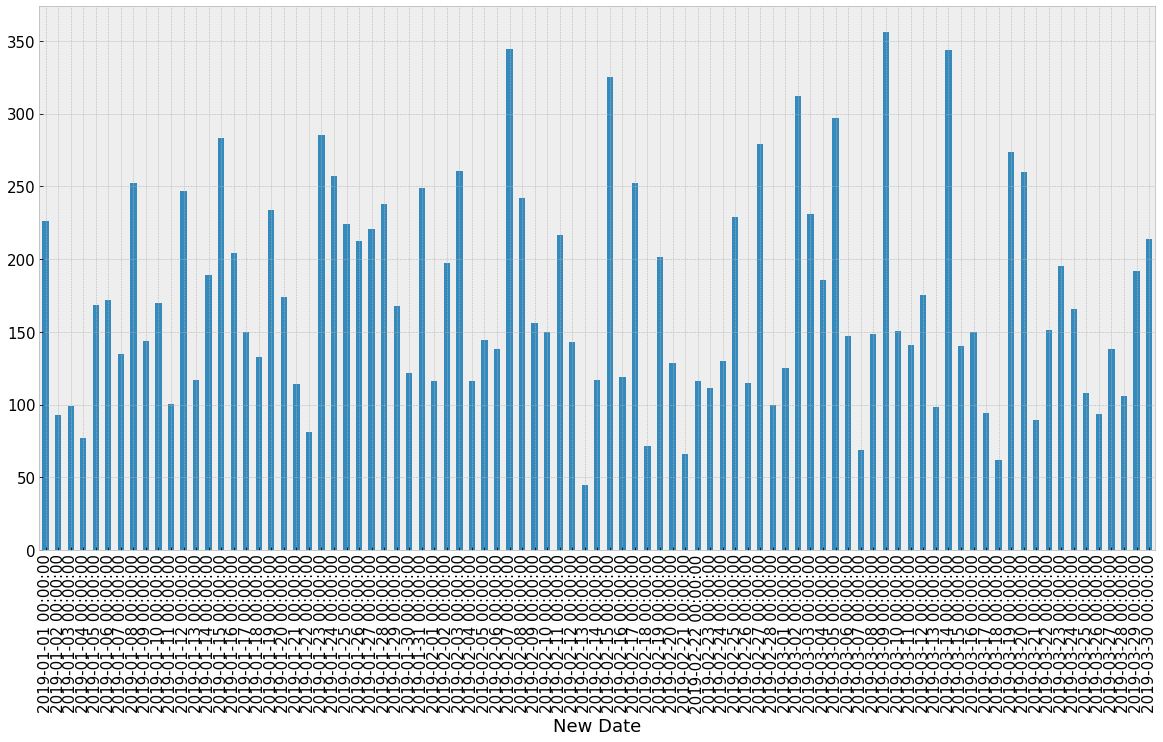

In [15]:
df['New Date'] = pd.DataFrame(pd.to_datetime(df['Date']))
df[df['New Date']<='2019-03-30'].groupby('New Date')['gross income'].sum().plot.bar()

6. Plot the changes in gross income from 2019-01-01 to 2019-03-30.

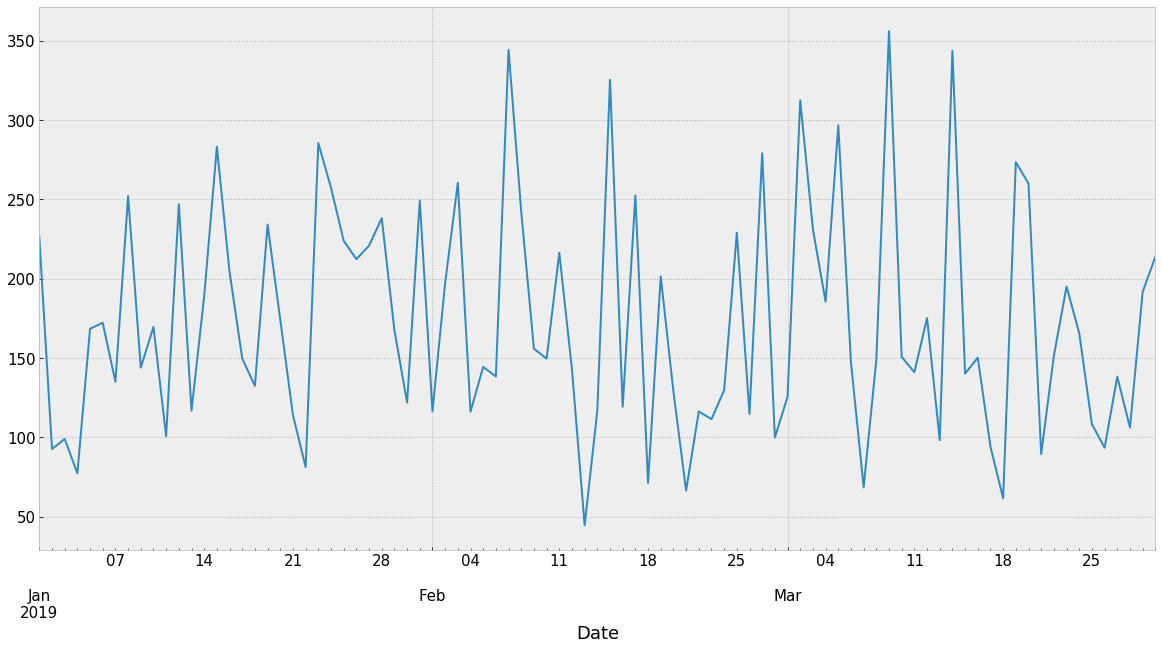

In [13]:
## ANS (5&6)
import datetime
df['Date']= pd.to_datetime(df['Date'])

df2 = df[(df['Date']>='2019-01-01') & (df['Date']<='2019-03-30') ]
df2.groupby('Date').sum()['gross income'].plot.line()

In [163]:
# df[df['New Date']=='2019-03-30'].groupby('New Date')['gross income'].value_counts()
df[df['New Date']<='2019-03-30'].groupby('New Date')['gross income'].max()
df[df['New Date']<='2019-03-30'].groupby('New Date')['gross income'].min()
df_3['changes in gross income']= df['Max'] - df['Min']
df['changes in gross income']


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: changes in gross income, Length: 1000, dtype: float64

7. Create a distribution plot of the ratings of all products.

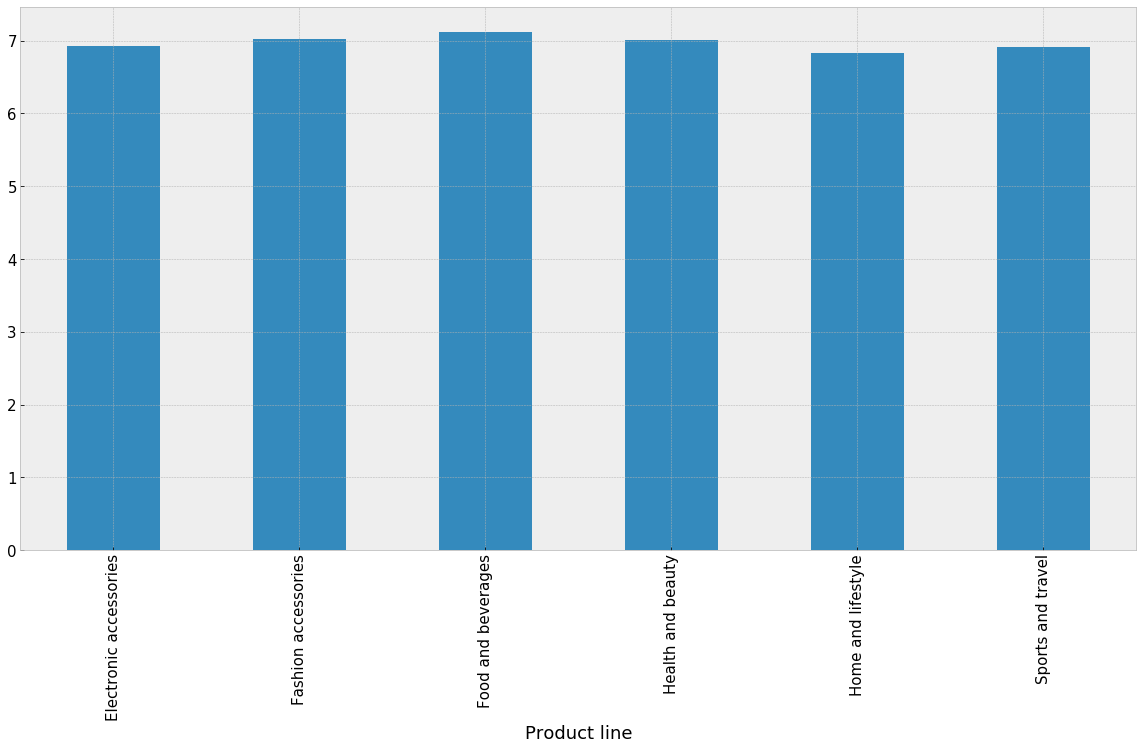

In [107]:
df.groupby('Product line')['Rating'].mean().plot.bar()

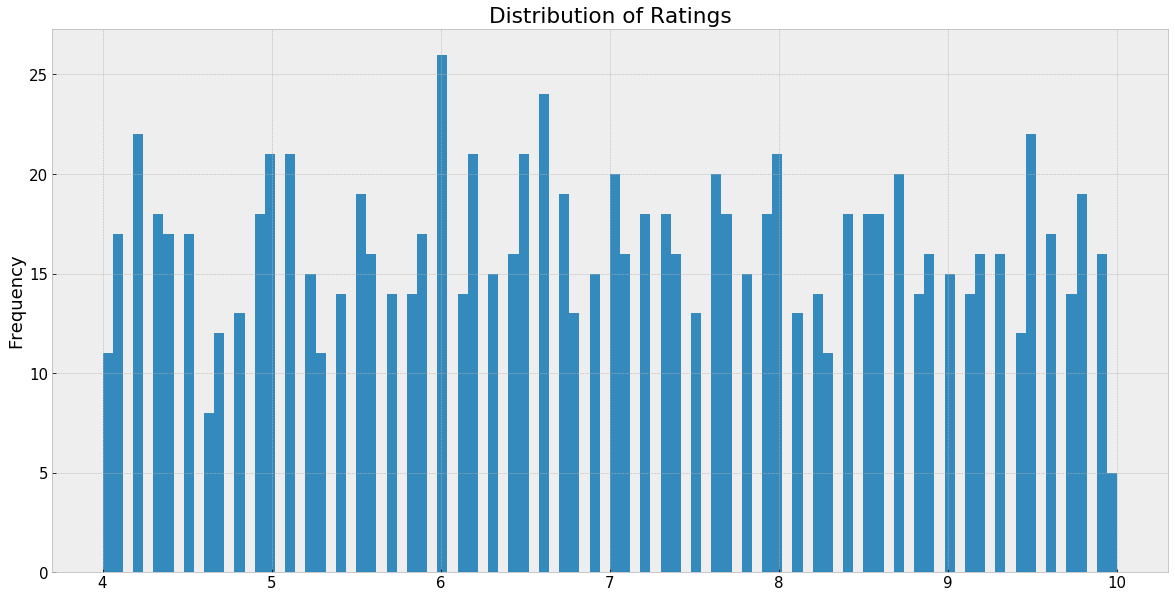

In [16]:
## ANS FROM OTHER
df['Rating'].plot(kind='hist', bins=100, title="Distribution of Ratings")

8. Create a pie chart that compares the counts of each payment method.

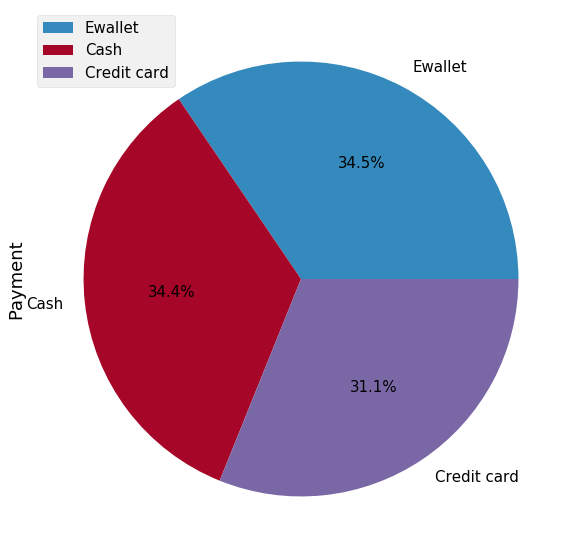

In [117]:
df['Payment'].value_counts().plot.pie(autopct='%1.1f%%',legend= True)

9. Create a scatter plot that visualizes the relationship between quantity and gross income.

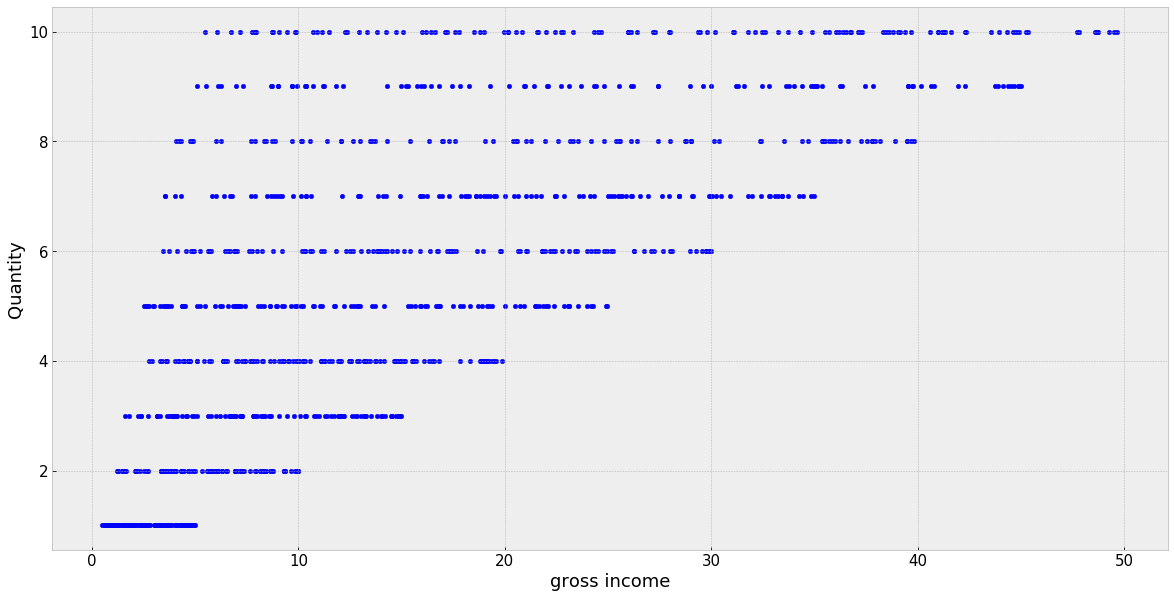

In [125]:
df.plot.scatter('gross income','Quantity')


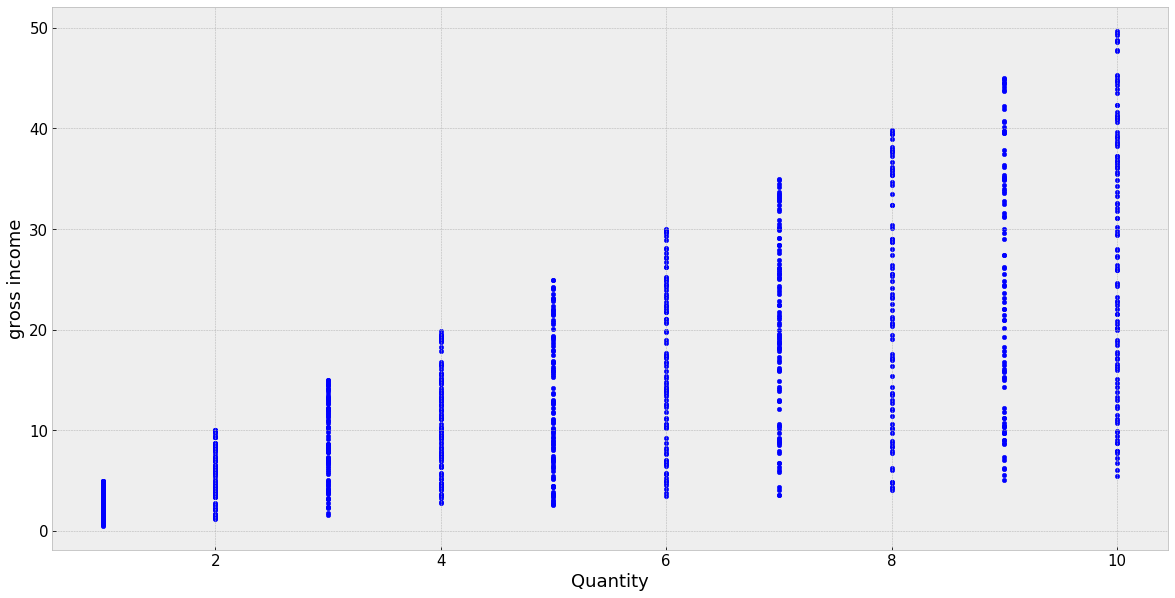

In [17]:
## ANS 
# get the required data
df
# plot
df.plot(kind='scatter',x='Quantity',y='gross income')

10. Create a bar chart that states the gross income for each month. (January to March 2019) Also include a line graph in the same plot to describe the trend between the months.

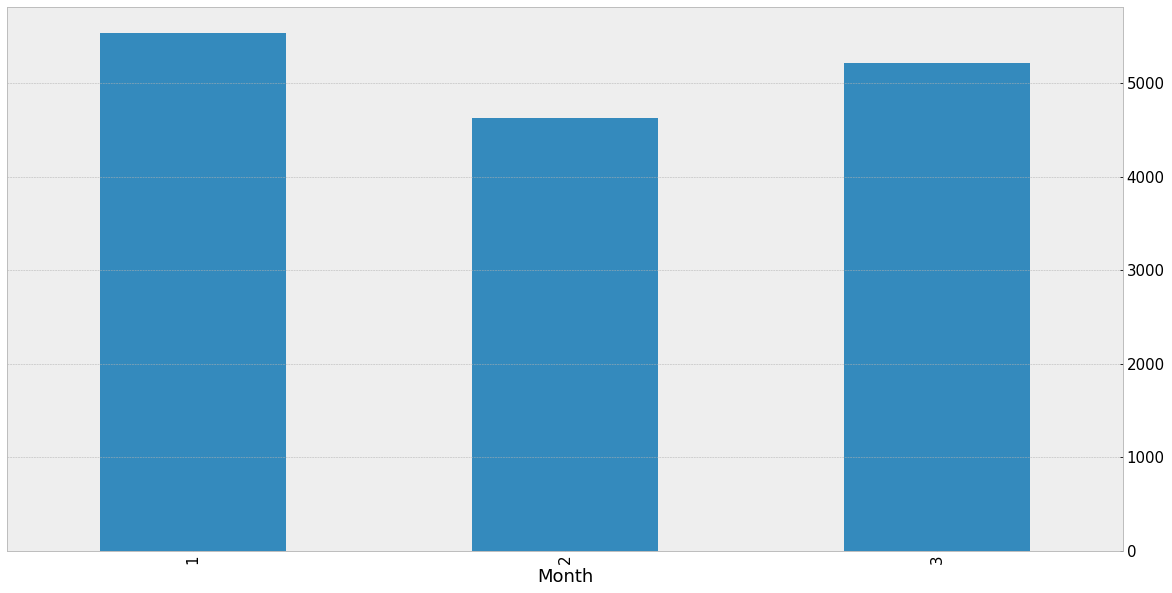

In [152]:
df['Month'] = df['Date'].str.split('/').str[0]
df.groupby('Month')['gross income'].sum().plot(kind='bar',secondary_y=True)

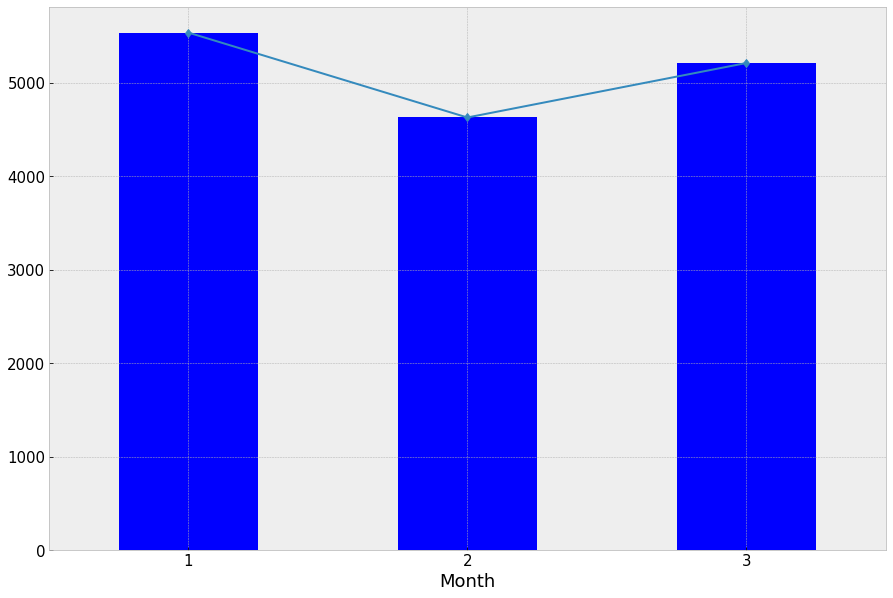

In [162]:
import matplotlib.pyplot as plt

df['Month'] = df['Date'].str.split('/').str[0]
# df.groupby('Month')['gross income'].sum().plot(kind='bar',secondary_y=True)

fig, ax1 = plt.subplots(figsize=(15, 10))
df.groupby('Month')['gross income'].sum().plot(kind='bar', color='b')
df.groupby('Month')['gross income'].sum().plot(kind='line', marker='d')
